In [1]:
import urllib2
import json
import random
import datetime

import math 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt 
 
%matplotlib inline
plt.style.use('ggplot')

### Missings

In [2]:
def findColumnsWithNan(d):
    features = list(d)
    containsMissings = []
    for i in range(0, d.shape[1]):
        if d.iloc[:, i].count() < d.shape[0]:
            containsMissings.append(features[i])
    return containsMissings

## DataFrame print settings

In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 12)

# Sample

In [7]:
df = pd.read_csv('ABT_09_05_2017.csv',
                                sep = ';',
                               dtype = {
                                   "account_id":"str",
                                    "assists":"int64",
                                    "attack_type_x":"object",
                                    "camps_stacked":"float64",
                                    "dire" : "object",
                                    "radiant" : "object",
                                    "cluster":"object",
                                    "creeps_stacked":"float64",
                                    "deaths":"int64",
                                    "duration":"str",
                                    "first_blood_time":"int64",
                                    "gold_per_min":"int64",
                                    "gold_spent":"int64",
                                    "hero_damage":"int64",
                                    "hero_healing":"int64",
                                    "hero_id":"str",
                                    "leagueid":"str",
                                    "leaguename":"str",
                                    "localized_name_x":"object",
                                    "match_id":"str",
                                    "player_slot":"str",
                                    "primary_attr_x":"object",
                                    "start_time":"str",
                                    "stuns":"float64",
                                    "t_experience_cnt_10":"float64",
                                    "t_experience_cnt_12":"float64",
                                    "t_experience_cnt_15":"float64",
                                    "t_experience_cnt_20":"float64",
                                    "t_experience_cnt_25":"float64",
                                    "t_experience_cnt_3":"float64",
                                    "t_experience_cnt_30":"float64",
                                    "t_experience_cnt_5":"float64",
                                    "t_experience_cnt_8":"float64",
                                    "t_gold_cnt_10":"float64",
                                    "t_gold_cnt_12":"float64",
                                    "t_gold_cnt_15":"float64",
                                    "t_gold_cnt_20":"float64",
                                    "t_gold_cnt_25":"float64",
                                    "t_gold_cnt_3":"float64",
                                    "t_gold_cnt_30":"float64",
                                    "t_gold_cnt_5":"float64",
                                    "t_gold_cnt_8":"float64",
                                    "t_lasthits_cnt_10":"float64",
                                    "t_lasthits_cnt_12":"float64",
                                    "t_lasthits_cnt_15":"float64",
                                    "t_lasthits_cnt_20":"float64",
                                    "t_lasthits_cnt_25":"float64",
                                    "t_lasthits_cnt_3":"float64",
                                    "t_lasthits_cnt_30":"float64",
                                    "t_lasthits_cnt_5":"float64",
                                    "t_lasthits_cnt_8":"float64",
                                    "t_experience_rpm_10":"float64",
                                    "t_experience_rpm_12":"float64",
                                    "t_experience_rpm_15":"float64",
                                    "t_experience_rpm_20":"float64",
                                    "t_experience_rpm_25":"float64",
                                    "t_experience_rpm_3":"float64",
                                    "t_experience_rpm_30":"float64",
                                    "t_experience_rpm_5":"float64",
                                    "t_experience_rpm_8":"float64",
                                    "t_gold_rpm_10":"float64",
                                    "t_gold_rpm_12":"float64",
                                    "t_gold_rpm_15":"float64",
                                    "t_gold_rpm_20":"float64",
                                    "t_gold_rpm_25":"float64",
                                    "t_gold_rpm_3":"float64",
                                    "t_gold_rpm_30":"float64",
                                    "t_gold_rpm_5":"float64",
                                    "t_gold_rpm_8":"float64",
                                    "t_lasthits_rpm_10":"float64",
                                    "t_lasthits_rpm_12":"float64",
                                    "t_lasthits_rpm_15":"float64",
                                    "t_lasthits_rpm_20":"float64",
                                    "t_lasthits_rpm_25":"float64",
                                    "t_lasthits_rpm_3":"float64",
                                    "t_lasthits_rpm_30":"float64",
                                    "t_lasthits_rpm_5":"float64",
                                    "t_lasthits_rpm_8":"float64",
                                    "team_id":"str",
                                    "tower_damage":"int64",
                                    "win":"bool",
                                    "xp_per_min":"int64",
                                    "id_x":"str",
                                    "datetime":"str",
                                    "t_item_aether_lens":"float64",
                                    "t_item_arcane_boots":"float64",
                                    "t_item_black_king_bar":"float64",
                                    "t_item_blade_mail":"float64",
                                    "t_item_blink":"float64",
                                    "t_item_boots":"float64",
                                    "t_item_bottle":"float64",
                                    "t_item_desolator":"float64",
                                    "t_item_echo_sabre":"float64",
                                    "t_item_force_staff":"float64",
                                    "t_item_hand_of_midas":"float64",
                                    "t_item_hurricane_pike":"float64",
                                    "t_item_invis_sword":"float64",
                                    "t_item_magic_wand":"float64",
                                    "t_item_manta":"float64",
                                    "t_item_phase_boots":"float64",
                                    "t_item_power_treads":"float64",
                                    "t_item_ring_of_aquila":"float64",
                                    "t_item_silver_edge":"float64",
                                    "t_item_sphere":"float64",
                                    "t_item_tranquil_boots":"float64",
                                    "t_item_travel_boots":"float64",
                                    "t_item_ultimate_scepter":"float64",
                                    "t_item_wind_lace":"float64",
                                    "t_first_kill":"float64",
                                    "t_sen_cnt_5":"int64",
                                    "t_sen_cnt_10":"int64",
                                    "t_sen_cnt_12":"int64",
                                    "t_sen_cnt_15":"int64",
                                    "t_sen_cnt_25":"int64",
                                    "t_sen_cnt_3":"int64",
                                    "t_sen_cnt_20":"int64",
                                    "t_sen_cnt_30":"int64",
                                    "t_sen_cnt_8":"int64",
                                    "t_obs_cnt_15":"int64",
                                    "t_obs_cnt_8":"int64",
                                    "t_obs_cnt_25":"int64",
                                    "t_obs_cnt_10":"int64",
                                    "t_obs_cnt_12":"int64",
                                    "t_obs_cnt_20":"int64",
                                    "t_obs_cnt_3":"int64",
                                    "t_obs_cnt_5":"int64",
                                    "t_obs_cnt_30":"int64",
                                    "t_runes_cnt_3":"int64",
                                    "t_runes_cnt_10":"int64",
                                    "t_runes_cnt_12":"int64",
                                    "t_runes_cnt_5":"int64",
                                    "t_runes_cnt_15":"int64",
                                    "t_runes_cnt_20":"int64",
                                    "t_runes_cnt_8":"int64",
                                    "t_runes_cnt_30":"int64",
                                    "t_runes_cnt_25":"int64",
                                    "t_buyback_cnt_3":"int64",
                                    "t_buyback_cnt_10":"int64",
                                    "t_buyback_cnt_12":"int64",
                                    "t_buyback_cnt_5":"int64",
                                    "t_buyback_cnt_25":"int64",
                                    "t_buyback_cnt_15":"int64",
                                    "t_buyback_cnt_8":"int64",
                                    "t_buyback_cnt_30":"int64",
                                    "t_buyback_cnt_20":"int64",
                                    "t_sen_rpm_5":"float64",
                                    "t_sen_rpm_10":"float64",
                                    "t_sen_rpm_12":"float64",
                                    "t_sen_rpm_15":"float64",
                                    "t_sen_rpm_25":"float64",
                                    "t_sen_rpm_3":"float64",
                                    "t_sen_rpm_20":"float64",
                                    "t_sen_rpm_30":"float64",
                                    "t_sen_rpm_8":"float64",
                                    "t_obs_rpm_15":"float64",
                                    "t_obs_rpm_8":"float64",
                                    "t_obs_rpm_25":"float64",
                                    "t_obs_rpm_10":"float64",
                                    "t_obs_rpm_12":"float64",
                                    "t_obs_rpm_20":"float64",
                                    "t_obs_rpm_3":"float64",
                                    "t_obs_rpm_5":"float64",
                                    "t_obs_rpm_30":"float64",
                                    "t_runes_rpm_3":"float64",
                                    "t_runes_rpm_10":"float64",
                                    "t_runes_rpm_12":"float64",
                                    "t_runes_rpm_5":"float64",
                                    "t_runes_rpm_15":"float64",
                                    "t_runes_rpm_20":"float64",
                                    "t_runes_rpm_8":"float64",
                                    "t_runes_rpm_30":"float64",
                                    "t_runes_rpm_25":"float64",
                                    "t_buyback_rpm_3":"float64",
                                    "t_buyback_rpm_10":"float64",
                                    "t_buyback_rpm_12":"float64",
                                    "t_buyback_rpm_5":"float64",
                                    "t_buyback_rpm_25":"float64",
                                    "t_buyback_rpm_15":"float64",
                                    "t_buyback_rpm_8":"float64",
                                    "t_buyback_rpm_30":"float64",
                                    "t_buyback_rpm_20":"float64",
                                    "Carry":"object",
                                    "Disabler":"object",
                                    "Durable":"object",
                                    "Escape":"object",
                                    "Initiator":"object",
                                    "Jungler":"object",
                                    "Nuker":"object",
                                    "Pusher":"object",
                                    "Support":"object",
                                    "attack_type_y":"object",
                                    "id_y":"str",
                                    "localized_name_y":"object",
                                    "primary_attr_y":"object",
                                    "pro_ban":"float64",
                                    "pro_pick":"float64",
                                    "pro_win":"float64",
                                    "role" : "object"
                               })

In [9]:
features = list(df)
target = 'win'

In [10]:
df

Unnamed: 0 account_id  assists attack_type_x  camps_stacked cluster  \
0              0   94155156       18        Ranged            2.0     135   
1              1   73562326       32        Ranged            0.0     137   
2              2  103735745        8        Ranged            1.0     134   
3              3   94155156        6        Ranged            1.0     135   
4              4  115102590        5        Ranged            3.0     135   
5              5   82262664       21        Ranged            2.0     131   
...          ...        ...      ...           ...            ...     ...   
5004        5309  106573901       19        Ranged            2.0     182   
5005        5310  103039499       25        Ranged            3.0     224   
5006        5311   98878010        5        Ranged            0.0     224   
5007        5312   89603649        9        Ranged            2.0     151   
5008        5313  129585121        4        Ranged            0.0     224   
5009        5314  101450083        6        Ranged            1.0     132   

      creeps_stacked  deaths  denies   dire duration  first_blood_time  \
0                6.0       5       2  False     3572               362   
1                0.0       5       1  False     3297                49   
2                3.0       8       5   True     2540               238   
3                5.0       6       4   True     2379               316   
4                9.0       6       2   True     1523                45   
5                6.0       2       1   True     2556               283   
...              ...     ...     ...    ...      ...               ...   
5004             3.0       6       2  False     2683                55   
5005             9.0       5       0  False     2631               110   
5006             0.0       7       2   True     1991               150   
5007             6.0       5       5   True     2992                47   
5008             0.0       1      25  False     2997               129   
5009             2.0       5      15   True     3149               251   

      gold_per_min  gold_spent  hero_damage  hero_healing hero_id  kills  \
0              302       14740         4343         10846      50      1   
1              323       12505        11193         21146      50      8   
2              190        7365         2266          6609      50      0   
3              217        7520         2591          3605      50      2   
4              216        5045         2872          5026      50      2   
5              265       10500         5732          9913      50      1   
...            ...         ...          ...           ...     ...    ...   
5004           506       17055        30978             0      22      9   
5005           292       11135         5781             0      68      2   
5006           160        4510         5352             0      68      0   
5007           343       13605         9222             0      68      4   
5008           625       26120        22095             0      59     13   
5009           735       29670        70984             0      59     14   

      last_hits leagueid                       leaguename  level  \
0           106     5157                       Kiev Major     25   
1            54     5157                       Kiev Major     24   
2            46     5157                       Kiev Major     14   
3            68     5157                       Kiev Major     14   
4            30     5157                       Kiev Major      9   
5            73     5157                       Kiev Major     19   
...         ...      ...                              ...    ...   
5004        259     5157                       Kiev Major     25   
5005         29     5313              Masters Manila 2017     17   
5006         17     5313              Masters Manila 2017     11   
5007         86     5157                       Kiev Major     18   
5008     

In [11]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']

In [12]:
id_columns = [  'account_id',    
                'duration', 
                'hero_id',
                'leagueid',                          
                'leaguename',
                'match_id',
                'player_slot',
                'start_time',
                'team_id',
                'id_x',
                'datetime',
                'attack_type_y',
                'id_y',
                'localized_name_y',
                'primary_attr_y',
                'Unnamed: 0',   
                'role',
            ]
categorical_columns = [x for x in categorical_columns if x not in id_columns]
numerical_columns = [x for x in numerical_columns if x not in id_columns]

# EXPLORE

In [13]:
df[categorical_columns].describe()

attack_type_x cluster   dire localized_name_x primary_attr_x radiant  \
count           5010    5010   5010             5010           5010    5010   
unique             2      27      2              111              3       2   
top            Melee     224  False   Crystal Maiden            int    True   
freq            2628    2539   2531              208           1785    2531   

       Carry Disabler Durable Escape Initiator Jungler Nuker Pusher Support  
count   5010     5010    5010   5010      5010    5010  5010   5010    5010  
unique     2        2       2      2         2       2     2      2       2  
top        1        1       0      0         0       0     1      0       0  
freq    2505     3923    3220   2577      2554    4145  3463   4194    3177

In [14]:
for c in categorical_columns:
    print c,'= ',df[c].unique()

attack_type_x =  ['Ranged' 'Melee']
cluster =  ['135' '137' '134' '131' '138' '133' '224' '154' '202' '122' '121' '123'
 '201' '183' '155' '132' '187' '156' '152' '136' '184' '182' '181' '153'
 '151' '186' '188']
dire =  ['False' 'True']
localized_name_x =  ['Dazzle' 'Troll Warlord' 'Treant Protector' 'Centaur Warrunner'
 'Timbersaw' 'Warlock' 'Alchemist' 'Outworld Devourer' 'Legion Commander'
 'Enchantress' 'Ember Spirit' 'Earth Spirit' 'Enigma' 'Terrorblade'
 'Crystal Maiden' 'Juggernaut' 'Silencer' 'Magnus' 'Lifestealer'
 'Dragon Knight' 'Axe' 'Night Stalker' 'Phoenix' 'Storm Spirit'
 'Elder Titan' 'Medusa' 'Templar Assassin' 'Batrider' 'Spectre' 'Ursa'
 'Sand King' 'Invoker' 'Slark' 'Tusk' 'Rubick' 'Death Prophet' 'Io'
 'Queen of Pain' 'Riki' 'Sven' 'Disruptor' 'Vengeful Spirit' 'Omniknight'
 'Morphling' 'Spirit Breaker' 'Faceless Void' 'Venomancer' 'Puck'
 'Clockwerk' 'Lina' 'Abaddon' 'Lycan' 'Dark Seer' 'Slardar' 'Pugna'
 'Phantom Assassin' 'Visage' 'Tiny' 'Kunkka' 'Naga Siren' '

In [15]:
df[numerical_columns].describe()

C:\Program Files (x86)\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


assists  camps_stacked  creeps_stacked       deaths       denies  \
count  5010.000000    5010.000000     5010.000000  5010.000000  5010.000000   
mean     11.138723       0.686427        1.910180     4.735529     7.169461   
std       6.177267       1.024980        3.153667     2.894380     8.114217   
min       0.000000       0.000000        0.000000     0.000000     0.000000   
25%       7.000000       0.000000        0.000000     3.000000     1.000000   
50%      11.000000       0.000000        0.000000     4.000000     4.000000   
75%      15.000000       1.000000        3.000000     7.000000    11.000000   
max      40.000000       9.000000       32.000000    17.000000    59.000000   

       first_blood_time  gold_per_min    gold_spent   hero_damage  \
count       5010.000000   5010.000000   5010.000000   5010.000000   
mean         144.253693    432.400599  15201.857285  14375.466866   
std          113.432755    169.184038   8238.595517  10682.392211   
min            0.000000    118.000000   2245.000000    781.000000   
25%           53.000000    300.000000   9316.250000   6891.250000   
50%          128.000000    403.000000  13247.500000  11204.500000   
75%          213.000000    548.000000  19346.250000  18793.250000   
max          687.000000   1238.000000  72890.000000  81278.000000   

       hero_healing        kills    last_hits        level        stuns  \
count   5010.000000  5010.000000  5010.000000  5010.000000  5010.000000   
mean    1077.695808     4.805988   178.802395    19.518962    25.322361   
std     2593.819715     4.117544   144.572495     4.335609    30.873959   
min        0.000000     0.000000     0.000000     7.000000    -3.726760   
25%        0.000000     2.000000    62.250000    16.000000     0.066875   
50%        0.000000     4.000000   147.000000    20.000000    16.762350   
75%      851.000000     7.000000   255.000000    23.000000    38.048275   
max    45900.000000    33.000000  1058.000000    25.000000   438.733000   

       t_experience_cnt_10  t_experience_cnt_12  t_experience_cnt_15  \
count          5010.000000          5010.000000          5010.000000   
mean           2608.600200          3399.428743          4609.492615   
std             992.758657          1199.560927          1519.264917   
min             470.000000           668.000000          1207.000000   
25%            1688.250000          2336.250000          3247.250000   
50%            2714.000000          3482.000000          4677.000000   
75%            3426.000000          4353.250000          5766.500000   
max            6861.000000          9295.000000         12710.000000   

       t_experience_cnt_20  t_experience_cnt_25  t_experience_cnt_3  \
count          5010.000000          4962.000000         5010.000000   
mean           6874.578044          9422.152761          362.883832   
std            2249.818879          3087.665219          191.613219   
min            2164.000000          2829.000000            0.000000   
25%            4919.250000                  NaN          205.000000   
50%            6930.500000                  NaN          336.000000   
75%            8548.000000                  NaN          525.750000   
max           22694.000000         27510.000000          997.000000   

       t_experience_cnt_30  t_experience_cnt_5  t_experience_cnt_8  \
count          4637.000000         5010.000000         5010.000000   
mean          12178.191503          932.205190         1889.674850   
std            4059.556191          412.994105          754.905931   
min            3138.000000           53.000000          306.000000   
25%                    NaN          571.000000         1182.000000   
50%                    NaN          927.000000         1965.500000   
75%                    NaN         1290.000000         2525.500000   
max           27840.000000         2230.000000         4076.000000   

       t_gold_cnt_10  t_gold_cnt_12  t_gold_cnt_15  t_gold_cnt_20  \
count    501

In [16]:
df[numerical_columns].corr()

assists  camps_stacked  creeps_stacked    deaths  \
assists            1.000000       0.034997        0.026249  0.074464   
camps_stacked      0.034997       1.000000        0.950379  0.038392   
creeps_stacked     0.026249       0.950379        1.000000  0.033747   
deaths             0.074464       0.038392        0.033747  1.000000   
denies            -0.147428      -0.186651       -0.188517 -0.191088   
first_blood_time  -0.069468       0.062527        0.059434 -0.076311   
...                     ...            ...             ...       ...   
t_lasthits_rpm_10 -0.220480      -0.158560       -0.181812 -0.293902   
t_lasthits_rpm_12 -0.227699      -0.148462       -0.172146 -0.294584   
t_lasthits_rpm_15 -0.237191      -0.142887       -0.166494 -0.299463   
t_lasthits_rpm_20 -0.238865      -0.138262       -0.163406 -0.298848   
t_lasthits_rpm_25 -0.234240      -0.128945       -0.155073 -0.300018   
t_lasthits_rpm_30 -0.236980      -0.122316       -0.148714 -0.310091   

                     denies  first_blood_time  gold_per_min  gold_spent  \
assists           -0.147428         -0.069468      0.008436    0.183080   
camps_stacked     -0.186651          0.062527     -0.086360   -0.048647   
creeps_stacked    -0.188517          0.059434     -0.117912   -0.082619   
deaths            -0.191088         -0.076311     -0.360653   -0.112368   
denies             1.000000         -0.009877      0.495814    0.407898   
first_blood_time  -0.009877          1.000000     -0.009873    0.006447   
...                     ...               ...           ...         ...   
t_lasthits_rpm_10  0.592278          0.018391      0.763368    0.578022   
t_lasthits_rpm_12  0.584845          0.015136      0.781072    0.592122   
t_lasthits_rpm_15  0.574026          0.016738      0.805973    0.612584   
t_lasthits_rpm_20  0.567354          0.015441      0.842216    0.646113   
t_lasthits_rpm_25  0.560875          0.009688      0.869491    0.679308   
t_lasthits_rpm_30  0.559489          0.005991      0.887559    0.717286   

                   hero_damage  hero_healing     kills  last_hits     level  \
assists               0.231583      0.223302  0.129546  -0.008545  0.389791   
camps_stacked        -0.072504      0.140082 -0.117871  -0.080899 -0.078201   
creeps_stacked       -0.101933      0.141899 -0.128072  -0.113081 -0.101805   
deaths                0.002430      0.028116 -0.176546  -0.111505 -0.001661   
denies                0.362362     -0.140835  0.373148   0.479599  0.334238   
first_blood_time     -0.008878      0.021807 -0.054619   0.010205 -0.021322   
...                        ...           ...       ...        ...       ...   
t_lasthits_rpm_10     0.475893     -0.183338  0.469680   0.703431  0.485134   
t_lasthits_rpm_12     0.483098     -0.183670  0.471156   0.721689  0.494463   
t_lasthits_rpm_15     0.490278     -0.184639  0.471008   0.747370  0.508037   
t_lasthits_rpm_20     0.513105     -0.188225  0.480816   0.785812  0.529382   
t_lasthits_rpm_25     0.537391     -0.187888  0.492234   0.819796  0.554358   
t_lasthits_rpm_30     0.566714     -0.189460  0.502427   0.853570  0.585835   

                      stuns  t_experience_cnt_10  t_experience_cnt_12  \
assists            0.283755            -0.180487            -0.177817   
camps_stacked     -0.046474            -0.152821            -0.135633   
creeps_stacked    -0.052159            -0.174304            -0.156212   
deaths             0.185807            -0.277796            -0.290910   
denies            -0.138535             0.524782             0.514392   
first_blood_time   0.014374            -0.013404            -0.010606   
...                     ...                  ...                  ...   
t_lasthits_rpm_10 -0.148697             0.913369             0.894870   
t_lasthits_rpm_12 -0.152893             0.903990             0.913519   
t_lasthits_rpm_15 -0.155758             0.888557             0.900543   
t_lasthits_rpm_20 -0.154694             0.859822  

# Modify

## Binarization

In [17]:
df_dummies = pd.get_dummies(df[categorical_columns])
binary_columns = list(df_dummies)

In [18]:
df = pd.concat([df, df_dummies], axis = 1)

## Heroes Popularity

In [19]:
heroPopularity = dict()
heroPopularityList = []
for f in list(df):
    popularity = 0
    if f.find('localized_name_') != -1 and f != 'localized_name_x' and f != 'localized_name_y':
        popularity = df[f].sum()
        heroPopularity[f] = popularity
from operator import itemgetter
heroPopularityList = sorted(heroPopularity.items(), key=itemgetter(1), reverse=True)

In [20]:
heroPopularityList

[('localized_name_x_Crystal Maiden', 208.0),
 ('localized_name_x_Juggernaut', 191.0),
 ('localized_name_x_Earth Spirit', 176.0),
 ('localized_name_x_Rubick', 174.0),
 ('localized_name_x_Warlock', 168.0),
 ('localized_name_x_Centaur Warrunner', 149.0),
 ('localized_name_x_Lina', 141.0),
 ('localized_name_x_Lifestealer', 135.0),
 ('localized_name_x_Slardar', 133.0),
 ('localized_name_x_Ember Spirit', 129.0),
 ('localized_name_x_Vengeful Spirit', 125.0),
 ('localized_name_x_Invoker', 119.0),
 ('localized_name_x_Legion Commander', 104.0),
 ('localized_name_x_Magnus', 96.0),
 ('localized_name_x_Sand King', 95.0),
 ('localized_name_x_Disruptor', 95.0),
 ('localized_name_x_Nyx Assassin', 88.0),
 ('localized_name_x_Shadow Fiend', 87.0),
 ('localized_name_x_Keeper of the Light', 86.0),
 ('localized_name_x_Weaver', 85.0),
 ('localized_name_x_Abaddon', 80.0),
 ('localized_name_x_Alchemist', 72.0),
 ('localized_name_x_Dazzle', 72.0),
 ('localized_name_x_Ogre Magi', 69.0),
 ('localized_name_x_Silen

## Missings

In [21]:
NanColumns = findColumnsWithNan(df)

In [22]:
NanColumns

['t_experience_cnt_25',
 't_experience_cnt_30',
 't_gold_cnt_25',
 't_gold_cnt_30',
 't_lasthits_cnt_25',
 't_lasthits_cnt_30',
 't_item_aether_lens',
 't_item_arcane_boots',
 't_item_black_king_bar',
 't_item_blade_mail',
 't_item_blink',
 't_item_boots',
 't_item_bottle',
 't_item_desolator',
 't_item_echo_sabre',
 't_item_force_staff',
 't_item_hand_of_midas',
 't_item_hurricane_pike',
 't_item_invis_sword',
 't_item_magic_wand',
 't_item_manta',
 't_item_phase_boots',
 't_item_power_treads',
 't_item_ring_of_aquila',
 't_item_silver_edge',
 't_item_sphere',
 't_item_tranquil_boots',
 't_item_travel_boots',
 't_item_ultimate_scepter',
 't_item_wind_lace',
 'pro_ban',
 't_experience_rpm_25',
 't_experience_rpm_30',
 't_gold_rpm_25',
 't_gold_rpm_30',
 't_lasthits_rpm_25',
 't_lasthits_rpm_30',
 'role']

In [23]:
df = df.fillna(df.mean())

In [74]:
findColumnsWithNan(df)

[]

In [73]:
df = df[~df['role'].apply(lambda x: math.isnan(float(x)))]

In [ ]:
findColumnsWithNan(df)

## Data Partition

In [75]:
if target in categorical_columns:
    categorical_columns.remove(target)
    print "Removed from categorical"
if target in numerical_columns:
    numerical_columns.remove(target)
    print "Removed from numerical"
if target in binary_columns:
    binary_columns.remove(target)
    print "Removed from numerical"

Removed from numerical


In [76]:
X = pd.concat([df[numerical_columns], df[binary_columns]], axis = 1)
y = df[target]

In [77]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print N_train, N_test

3451 1479


C:\Program Files (x86)\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Drop List

In [78]:
clusterVars = []
for f in list(X_train):
    if f.find('cluster') != -1:
        clusterVars.append(f)
clusterVars

['cluster_121',
 'cluster_122',
 'cluster_123',
 'cluster_131',
 'cluster_132',
 'cluster_133',
 'cluster_134',
 'cluster_135',
 'cluster_136',
 'cluster_137',
 'cluster_138',
 'cluster_151',
 'cluster_152',
 'cluster_153',
 'cluster_154',
 'cluster_155',
 'cluster_156',
 'cluster_181',
 'cluster_182',
 'cluster_183',
 'cluster_184',
 'cluster_186',
 'cluster_187',
 'cluster_188',
 'cluster_201',
 'cluster_202',
 'cluster_224']

## Normalization [0,1]

In [79]:
X_train_norm = X_train[numerical_columns].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
X_test_norm = X_test[numerical_columns].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [80]:
X_train_norm = pd.concat([X_train[binary_columns], X_train_norm], axis = 1)
X_test_norm = pd.concat([X_test[binary_columns], X_test_norm], axis = 1)
print X_train_norm.shape, X_test_norm.shape

(3451, 335) (1479, 335)


In [81]:
trainColumnsWithNan = findColumnsWithNan(X_train_norm)
testColumnsWithNan = findColumnsWithNan(X_test_norm)
ColumnsWithNan = trainColumnsWithNan
for col in testColumnsWithNan:
    if col not in trainColumnsWithNan:
        ColumnsWithNan.append(col)
print ColumnsWithNan

['t_buyback_cnt_10', 't_buyback_cnt_3', 't_buyback_cnt_5', 't_buyback_cnt_8', 't_buyback_rpm_10', 't_buyback_rpm_3', 't_buyback_rpm_5', 't_buyback_rpm_8']


In [82]:
X_train_norm = X_train_norm.drop(ColumnsWithNan, axis = 1)
X_test_norm = X_test_norm.drop(ColumnsWithNan, axis = 1)

## Outliers detection

In [84]:
from sklearn.ensemble import IsolationForest

isNotOutlier = IsolationForest(contamination = 0.01)
isNotOutlier.fit(X_train_norm)

IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [85]:
X_train_norm_filtered = X_train_norm[isNotOutlier.predict(X_train_norm) == 1]
y_train_filtered = y_train[isNotOutlier.predict(X_train_norm) == 1]

In [86]:
print X_train_norm_filtered.shape, y_train_filtered.shape

(3416, 327) (3416L,)


# Model

## Regression

In [87]:
X_train_norm_filtered.drop(clusterVars, axis = 1, inplace = True)
X_test_norm.drop(clusterVars, axis = 1, inplace = True)

C:\Program Files (x86)\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lm = LogisticRegression(penalty = 'l1', C = 1, fit_intercept=False)
lm.fit(X_train_norm_filtered, y_train_filtered)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Assess

In [89]:
X_train_norm_filtered.shape, X_test_norm.shape

((3416, 300), (1479, 300))

In [90]:
print "Train accuracy = %s" %metrics.accuracy_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Test accuracy = %s" %metrics.accuracy_score(y_test, lm.predict(X_test_norm))

print "Train AUC = %s" %metrics.roc_auc_score(y_train_filtered, lm.predict_proba(X_train_norm_filtered)[:,1])
print "Test AUC = %s" %metrics.roc_auc_score(y_test, lm.predict_proba(X_test_norm)[:,1])

print "Train Recall = %s" %metrics.recall_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Test Recall = %s" %metrics.recall_score(y_test, lm.predict(X_test_norm))

print "Train Precision = %s" %metrics.precision_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Test Precision = %s" %metrics.precision_score(y_test, lm.predict(X_test_norm))

Train accuracy = 0.933255269321
Test accuracy = 0.905341446924
Train AUC = 0.981260791834
Test AUC = 0.973773696097
Train Recall = 0.93472144063
Test Recall = 0.952693823916
Train Precision = 0.936830231246
Test Precision = 0.874547647768


In [91]:
try:
    del importanceLM
except Exception:
    print 'importanceLM does not exists'
importanceLM = dict()
for i in range(lm.coef_.shape[1]):
    importanceLM[list(X_train_norm_filtered)[i]] = lm.coef_.tolist()[0][i]
from operator import itemgetter
featureImportanceLM = sorted(importanceLM.items(), key=itemgetter(1), reverse=True)
print 'importanceLM has been created'

importanceLM does not exists
importanceLM has been created


In [41]:
featureImportanceLM

[('gold_per_min', 38.14366433047952),
 ('assists', 14.055368225338118),
 ('tower_damage', 8.043243606232968),
 ('kills', 6.117380387295986),
 ('localized_name_x_Timbersaw', 2.6619527685657838),
 ('localized_name_x_Legion Commander', 2.0266159081466197),
 ('localized_name_x_Tinker', 1.5631309915837939),
 ('localized_name_x_Sand King', 1.2922136608314128),
 ('localized_name_x_Storm Spirit', 1.1739153825422481),
 ('localized_name_x_Winter Wyvern', 1.1016375445139734),
 ('localized_name_x_Abaddon', 1.0576846173053487),
 ('localized_name_x_Vengeful Spirit', 1.0384059139652817),
 ('pro_ban', 1.002235172861941),
 ('localized_name_x_Io', 0.9911196878250128),
 ('camps_stacked', 0.8763529273973142),
 ('localized_name_x_Ember Spirit', 0.8680904767405814),
 ('localized_name_x_Slardar', 0.8663333106869453),
 ('t_item_tranquil_boots', 0.7482757830553105),
 ('creeps_stacked', 0.7183491716932222),
 ('t_experience_cnt_3', 0.7057721173112075),
 ('t_item_wind_lace', 0.6928439477469726),
 ('localized_name

In [92]:
heroImportanceLM = []
heroDict = {}
for i in range(len(featureImportanceLM)):
    if featureImportanceLM[i][0].find('localized_name_x') != -1:
        heroDict[featureImportanceLM[i][0]] = featureImportanceLM[i][1]
heroImportanceLM = sorted(heroDict.items(), key=itemgetter(1), reverse=True)        

In [93]:
heroImportanceLM

[('localized_name_x_Timbersaw', 1.9731397195137408),
 ('localized_name_x_Tinker', 1.8677316720465353),
 ('localized_name_x_Legion Commander', 1.6125908248530236),
 ('localized_name_x_Winter Wyvern', 1.4057459431694699),
 ('localized_name_x_Abaddon', 1.1551417485492532),
 ('localized_name_x_Vengeful Spirit', 0.9345563841084232),
 ('localized_name_x_Storm Spirit', 0.9338124288762016),
 ('localized_name_x_Io', 0.9151125422170611),
 ('localized_name_x_Ember Spirit', 0.8731619695941678),
 ('localized_name_x_Slardar', 0.8227406385712603),
 ('localized_name_x_Pudge', 0.7262201283671813),
 ('localized_name_x_Sand King', 0.6791486174604507),
 ('localized_name_x_Outworld Devourer', 0.5883062625396762),
 ('localized_name_x_Keeper of the Light', 0.479606549744378),
 ('localized_name_x_Crystal Maiden', 0.4586190848328676),
 ('localized_name_x_Riki', 0.2517401161307693),
 ('localized_name_x_Beastmaster', 0.14510360494412522),
 ('localized_name_x_Lina', 0.06536197402243557),
 ('localized_name_x_Axe',

# Scoring

In [95]:
sdf = pd.read_csv('ABT_09_05_2017.csv',
                                sep = ';',
                               dtype = {
                                   "account_id":"str",
                                    "assists":"int64",
                                    "attack_type_x":"object",
                                    "camps_stacked":"float64",
                                    "dire" : "object",
                                    "radiant" : "object",
                                    "cluster":"object",
                                    "creeps_stacked":"float64",
                                    "deaths":"int64",
                                    "duration":"str",
                                    "first_blood_time":"int64",
                                    "gold_per_min":"int64",
                                    "gold_spent":"int64",
                                    "hero_damage":"int64",
                                    "hero_healing":"int64",
                                    "hero_id":"str",
                                    "leagueid":"str",
                                    "leaguename":"str",
                                    "localized_name_x":"object",
                                    "match_id":"str",
                                    "player_slot":"str",
                                    "primary_attr_x":"object",
                                    "start_time":"str",
                                    "stuns":"float64",
                                    "t_experience_cnt_10":"float64",
                                    "t_experience_cnt_12":"float64",
                                    "t_experience_cnt_15":"float64",
                                    "t_experience_cnt_20":"float64",
                                    "t_experience_cnt_25":"float64",
                                    "t_experience_cnt_3":"float64",
                                    "t_experience_cnt_30":"float64",
                                    "t_experience_cnt_5":"float64",
                                    "t_experience_cnt_8":"float64",
                                    "t_gold_cnt_10":"float64",
                                    "t_gold_cnt_12":"float64",
                                    "t_gold_cnt_15":"float64",
                                    "t_gold_cnt_20":"float64",
                                    "t_gold_cnt_25":"float64",
                                    "t_gold_cnt_3":"float64",
                                    "t_gold_cnt_30":"float64",
                                    "t_gold_cnt_5":"float64",
                                    "t_gold_cnt_8":"float64",
                                    "t_lasthits_cnt_10":"float64",
                                    "t_lasthits_cnt_12":"float64",
                                    "t_lasthits_cnt_15":"float64",
                                    "t_lasthits_cnt_20":"float64",
                                    "t_lasthits_cnt_25":"float64",
                                    "t_lasthits_cnt_3":"float64",
                                    "t_lasthits_cnt_30":"float64",
                                    "t_lasthits_cnt_5":"float64",
                                    "t_lasthits_cnt_8":"float64",
                                    "t_experience_rpm_10":"float64",
                                    "t_experience_rpm_12":"float64",
                                    "t_experience_rpm_15":"float64",
                                    "t_experience_rpm_20":"float64",
                                    "t_experience_rpm_25":"float64",
                                    "t_experience_rpm_3":"float64",
                                    "t_experience_rpm_30":"float64",
                                    "t_experience_rpm_5":"float64",
                                    "t_experience_rpm_8":"float64",
                                    "t_gold_rpm_10":"float64",
                                    "t_gold_rpm_12":"float64",
                                    "t_gold_rpm_15":"float64",
                                    "t_gold_rpm_20":"float64",
                                    "t_gold_rpm_25":"float64",
                                    "t_gold_rpm_3":"float64",
                                    "t_gold_rpm_30":"float64",
                                    "t_gold_rpm_5":"float64",
                                    "t_gold_rpm_8":"float64",
                                    "t_lasthits_rpm_10":"float64",
                                    "t_lasthits_rpm_12":"float64",
                                    "t_lasthits_rpm_15":"float64",
                                    "t_lasthits_rpm_20":"float64",
                                    "t_lasthits_rpm_25":"float64",
                                    "t_lasthits_rpm_3":"float64",
                                    "t_lasthits_rpm_30":"float64",
                                    "t_lasthits_rpm_5":"float64",
                                    "t_lasthits_rpm_8":"float64",
                                    "team_id":"str",
                                    "tower_damage":"int64",
                                    "win":"bool",
                                    "xp_per_min":"int64",
                                    "id_x":"str",
                                    "datetime":"str",
                                    "t_item_aether_lens":"float64",
                                    "t_item_arcane_boots":"float64",
                                    "t_item_black_king_bar":"float64",
                                    "t_item_blade_mail":"float64",
                                    "t_item_blink":"float64",
                                    "t_item_boots":"float64",
                                    "t_item_bottle":"float64",
                                    "t_item_desolator":"float64",
                                    "t_item_echo_sabre":"float64",
                                    "t_item_force_staff":"float64",
                                    "t_item_hand_of_midas":"float64",
                                    "t_item_hurricane_pike":"float64",
                                    "t_item_invis_sword":"float64",
                                    "t_item_magic_wand":"float64",
                                    "t_item_manta":"float64",
                                    "t_item_phase_boots":"float64",
                                    "t_item_power_treads":"float64",
                                    "t_item_ring_of_aquila":"float64",
                                    "t_item_silver_edge":"float64",
                                    "t_item_sphere":"float64",
                                    "t_item_tranquil_boots":"float64",
                                    "t_item_travel_boots":"float64",
                                    "t_item_ultimate_scepter":"float64",
                                    "t_item_wind_lace":"float64",
                                    "t_first_kill":"float64",
                                    "t_sen_cnt_5":"int64",
                                    "t_sen_cnt_10":"int64",
                                    "t_sen_cnt_12":"int64",
                                    "t_sen_cnt_15":"int64",
                                    "t_sen_cnt_25":"int64",
                                    "t_sen_cnt_3":"int64",
                                    "t_sen_cnt_20":"int64",
                                    "t_sen_cnt_30":"int64",
                                    "t_sen_cnt_8":"int64",
                                    "t_obs_cnt_15":"int64",
                                    "t_obs_cnt_8":"int64",
                                    "t_obs_cnt_25":"int64",
                                    "t_obs_cnt_10":"int64",
                                    "t_obs_cnt_12":"int64",
                                    "t_obs_cnt_20":"int64",
                                    "t_obs_cnt_3":"int64",
                                    "t_obs_cnt_5":"int64",
                                    "t_obs_cnt_30":"int64",
                                    "t_runes_cnt_3":"int64",
                                    "t_runes_cnt_10":"int64",
                                    "t_runes_cnt_12":"int64",
                                    "t_runes_cnt_5":"int64",
                                    "t_runes_cnt_15":"int64",
                                    "t_runes_cnt_20":"int64",
                                    "t_runes_cnt_8":"int64",
                                    "t_runes_cnt_30":"int64",
                                    "t_runes_cnt_25":"int64",
                                    "t_buyback_cnt_3":"int64",
                                    "t_buyback_cnt_10":"int64",
                                    "t_buyback_cnt_12":"int64",
                                    "t_buyback_cnt_5":"int64",
                                    "t_buyback_cnt_25":"int64",
                                    "t_buyback_cnt_15":"int64",
                                    "t_buyback_cnt_8":"int64",
                                    "t_buyback_cnt_30":"int64",
                                    "t_buyback_cnt_20":"int64",
                                    "t_sen_rpm_5":"float64",
                                    "t_sen_rpm_10":"float64",
                                    "t_sen_rpm_12":"float64",
                                    "t_sen_rpm_15":"float64",
                                    "t_sen_rpm_25":"float64",
                                    "t_sen_rpm_3":"float64",
                                    "t_sen_rpm_20":"float64",
                                    "t_sen_rpm_30":"float64",
                                    "t_sen_rpm_8":"float64",
                                    "t_obs_rpm_15":"float64",
                                    "t_obs_rpm_8":"float64",
                                    "t_obs_rpm_25":"float64",
                                    "t_obs_rpm_10":"float64",
                                    "t_obs_rpm_12":"float64",
                                    "t_obs_rpm_20":"float64",
                                    "t_obs_rpm_3":"float64",
                                    "t_obs_rpm_5":"float64",
                                    "t_obs_rpm_30":"float64",
                                    "t_runes_rpm_3":"float64",
                                    "t_runes_rpm_10":"float64",
                                    "t_runes_rpm_12":"float64",
                                    "t_runes_rpm_5":"float64",
                                    "t_runes_rpm_15":"float64",
                                    "t_runes_rpm_20":"float64",
                                    "t_runes_rpm_8":"float64",
                                    "t_runes_rpm_30":"float64",
                                    "t_runes_rpm_25":"float64",
                                    "t_buyback_rpm_3":"float64",
                                    "t_buyback_rpm_10":"float64",
                                    "t_buyback_rpm_12":"float64",
                                    "t_buyback_rpm_5":"float64",
                                    "t_buyback_rpm_25":"float64",
                                    "t_buyback_rpm_15":"float64",
                                    "t_buyback_rpm_8":"float64",
                                    "t_buyback_rpm_30":"float64",
                                    "t_buyback_rpm_20":"float64",
                                    "Carry":"object",
                                    "Disabler":"object",
                                    "Durable":"object",
                                    "Escape":"object",
                                    "Initiator":"object",
                                    "Jungler":"object",
                                    "Nuker":"object",
                                    "Pusher":"object",
                                    "Support":"object",
                                    "attack_type_y":"object",
                                    "id_y":"str",
                                    "localized_name_y":"object",
                                    "primary_attr_y":"object",
                                    "pro_ban":"float64",
                                    "pro_pick":"float64",
                                    "pro_win":"float64",
                                    "role" : "object"
                               })

## Binarization

In [96]:
sdf_dummies = pd.get_dummies(sdf[categorical_columns])
binary_columns = list(sdf_dummies)
sdf = pd.concat([sdf, sdf_dummies], axis = 1)

In [97]:
sdf.shape

(5010, 368)

## Missings

In [99]:
sdf = sdf.fillna(sdf.mean())
findColumnsWithNan(sdf)
sdf = sdf[~sdf['role'].apply(lambda x: math.isnan(float(x)))]
findColumnsWithNan(sdf)

[]

## Normalization

In [100]:
sdf_norm = sdf[numerical_columns].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
sdf_norm = pd.concat([sdf[binary_columns], sdf_norm], axis = 1)
sdf_norm = sdf_norm.drop(ColumnsWithNan, axis = 1)
sdf_norm.shape

(4930, 327)

## LM - Scoring

In [101]:
score = pd.DataFrame() 

In [102]:
prediction = lm.predict(sdf_norm[list(X_train_norm_filtered)])
win_prob = lm.predict_proba(sdf_norm[list(X_train_norm_filtered)])[:,1]

In [103]:
score['prediction'] = prediction
score['win_prob'] = win_prob

In [104]:
print "Train accuracy = %s" %metrics.accuracy_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Scored accuracy = %s" %metrics.accuracy_score(sdf['win'], prediction)

Train accuracy = 0.933255269321
Scored accuracy = 0.9261663286


In [105]:
score

prediction  win_prob
0          True  0.911146
1          True  0.999764
2         False  0.016190
3         False  0.021420
4         False  0.025281
5          True  0.946510
...         ...       ...
4924       True  0.901072
4925       True  0.998933
4926      False  0.011553
4927       True  0.857044
4928       True  0.993611
4929       True  0.988901

[4930 rows x 2 columns]

# Join Score

In [113]:
matches = pd.concat([sdf, score], axis = 1)
matches = matches[~matches['prediction'].apply(lambda x: x is np.nan)]

In [114]:
matches[['account_id', 'match_id', 'team_id', 'datetime', 'win', 'win_prob', 'prediction']]

account_id    match_id  team_id             datetime    win  win_prob  \
0      94155156  3149572447  2586976  30.04.2017 22:09:06   True  0.911146   
1      73562326  3147569106       39  30.04.2017 00:39:15   True  0.999764   
2     103735745  3144980236  4251435  28.04.2017 18:56:43  False  0.016190   
3      94155156  3144607791  2586976  28.04.2017 15:51:09  False  0.021420   
4     115102590  3144097046  2108395  28.04.2017 10:09:42  False  0.025281   
5      82262664  3142860818     2163  27.04.2017 16:00:15   True  0.946510   
...         ...         ...      ...                  ...    ...       ...   
4924   72312627  3083318471     2163  28.03.2017 16:15:05   True  0.901072   
4925   96196828  3081860088  2621843  27.03.2017 20:49:27   True  0.998933   
4926  129585121  3076244318  4253054  25.03.2017 09:52:52  False  0.011553   
4927  137193239  3057837348  2640025  16.03.2017 09:13:44   True  0.857044   
4928  130416036  3056712176  3547682  15.03.2017 16:19:10   True  0.993611   
4929   90892734  3056374006        5  15.03.2017 13:12:10   True  0.988901   

     prediction  
0          True  
1          True  
2         False  
3         False  
4         False  
5          True  
...         ...  
4924       True  
4925       True  
4926      False  
4927       True  
4928       True  
4929       True  

[4930 rows x 7 columns]

# Cumulative Score (match_id + team_id)

In [115]:
cumprob = matches.groupby(['match_id', 'team_id'], as_index=False)['win_prob'].sum()
cumprob.rename(columns = {'win_prob' : 'cumulative_prob'}, inplace = True)

In [116]:
cumprob

match_id  team_id  cumulative_prob
0     3031875960  3322396         0.490297
1     3031875960  3326875         0.572150
2     3031875960  3659536         1.526007
3     3032008366  3322396         0.783624
4     3032008366  3326875         1.732296
5     3032008366  3659536         1.857306
...          ...      ...              ...
1197  3149353238  1883502         1.743326
1198  3149353238  2586976         1.656556
1199  3149480550  1883502         3.233150
1200  3149480550  2586976         3.146017
1201  3149572447  1883502         1.900475
1202  3149572447  2586976         2.843987

[1203 rows x 3 columns]

In [117]:
matches = pd.merge(matches, cumprob, on=['match_id', 'team_id'], how='inner')
matches.rename(columns = {'win_prob_x' : 'win_prob', 'win_prob_y' : 'cumulative_prob'}, inplace = True)

In [118]:
matches['win_contribution'] = matches['win_prob'] / matches['cumulative_prob']

In [119]:
matches.loc[25:36, ['account_id', 'match_id', 'team_id', 'datetime', 'win', 'prediction', 'win_prob','cumulative_prob', 'win_contribution']]

account_id    match_id  team_id             datetime   win prediction  \
25   82262664  3142860818     2163  27.04.2017 16:00:15  True       True   
26  105248644  3142860818     2163  27.04.2017 16:00:15  True       True   
27   72312627  3142860818     2163  27.04.2017 16:00:15  True       True   
28  101356886  3142860818     2163  27.04.2017 16:00:15  True       True   
29   34505203  3142860818     2163  27.04.2017 16:00:15  True      False   
30  115102590  3140008780  2108395  25.04.2017 23:09:31  True       True   
31  184950344  3140008780  2108395  25.04.2017 23:09:31  True      False   
32  132309493  3140008780  2108395  25.04.2017 23:09:31  True       True   
33  155494381  3140008780  2108395  25.04.2017 23:09:31  True       True   
34  187619311  3140008780  2108395  25.04.2017 23:09:31  True       True   
35  115102590  3139957604  2108395  25.04.2017 22:20:06  True       True   
36  187619311  3139957604  2108395  25.04.2017 22:20:06  True      False   

    win_prob  cumulative_prob  win_contribution  
25  0.946510         3.922708          0.241290  
26  0.996795         3.922708          0.254109  
27  0.996999         3.922708          0.254161  
28  0.980762         3.922708          0.250022  
29  0.001642         3.922708          0.000418  
30  0.933891         3.912494          0.238695  
31  0.039947         3.912494          0.010210  
32  0.992939         3.912494          0.253787  
33  0.994847         3.912494          0.254274  
34  0.950870         3.912494          0.243034  
35  0.726178         3.085253          0.235371  
36  0.361728         3.085253          0.117244

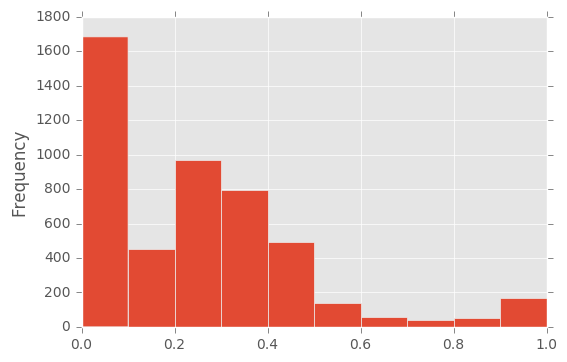

In [120]:
matches['win_contribution'].plot(kind = 'hist')

In [121]:
matches[matches['match_id'] == '3140008780']

Unnamed: 0 account_id  assists attack_type_x  camps_stacked cluster  \
30           6.0  115102590     10.0        Ranged            0.0     131   
31         643.0  184950344      1.0        Ranged            0.0     131   
32        2350.0  132309493     16.0         Melee            0.0     131   
33        3889.0  155494381     11.0         Melee            0.0     131   
34        4735.0  187619311      7.0         Melee            0.0     131   
3384      1235.0   85805514      1.0        Ranged            1.0     131   
3385      2013.0  154715080      1.0         Melee            0.0     131   
3386      3736.0   30237211      2.0         Melee            0.0     131   
3387      4461.0  145550466      2.0         Melee            0.0     131   

      creeps_stacked  deaths  denies   dire duration  first_blood_time  \
30               0.0     0.0     3.0  False     1944             125.0   
31               0.0     1.0    14.0  False     1944             125.0   
32               0.0     2.0    10.0  False     1944             125.0   
33               0.0     0.0     1.0  False     1944             125.0   
34               0.0     2.0     4.0  False     1944             125.0   
3384             3.0     8.0     1.0   True     1944             125.0   
3385             0.0     3.0     7.0   True     1944             125.0   
3386             0.0     4.0     3.0   True     1944             125.0   
3387             0.0     7.0     2.0   True     1944             125.0   

      gold_per_min  gold_spent  hero_damage  hero_healing hero_id  kills  \
30           289.0      7450.0       3501.0        9160.0      50    4.0   
31           723.0     22830.0      24183.0           0.0      76   12.0   
32           474.0     11965.0      15139.0         335.0      67    5.0   
33           281.0      7850.0       2986.0           0.0      28    1.0   
34           317.0      7915.0       6992.0           0.0      88    3.0   
3384         153.0      4600.0       4309.0           0.0       5    0.0   
3385         380.0     13395.0       7409.0           0.0      49    2.0   
3386         373.0     12235.0       5383.0         543.0     102    0.0   
3387         123.0      3140.0       2551.0        1196.0      85    0.0   

      last_hits leagueid  leaguename  level   localized_name_x    match_id  \
30         41.0     5157  Kiev Major   14.0             Dazzle  3140008780   
31        275.0     5157  Kiev Major   22.0  Outworld Devourer  3140008780   
32        177.0     5157  Kiev Major   18.0            Spectre  3140008780   
33         40.0     5157  Kiev Major   17.0            Slardar  3140008780   
34         39.0     5157  Kiev Major   15.0       Nyx Assassin  3140008780   
3384       27.0     5157  Kiev Major    9.0     Crystal Maiden  3140008780   
3385      143.0     5157  Kiev Major   17.0      Dragon Knight  3140008780   
3386      180.0     5157  Kiev Major   17.0            Abaddon  3140008780   
3387        7.0     5157  Kiev Major    9.0            Undying  3140008780   

     player_slot primary_attr_x radiant  start_time    stuns  \
30             1            int    True  1493150971   0.0000   
31             0            int    True  1493150971  90.0378   
32             2            agi    True  1493150971   0.0000   
33             3            str    True  1493150971  24.5938   
34             4            agi    True  1493150971  46.4276   
3384         130            int   False  1493150971  16.2296   
3385         129            str   False  1493150971  25.3973   
3386         128            str   False  1493150971   0.0000   
3387         132            str   False  1493150971   0.0000   

      t_experience_cnt_10  t_experience_cnt_12  t_experience_cnt_15  \
30                 1219.0               1842.0               2347.0   
31                 3407.0               4901.0               6139.0   
32                 2768.0               3729.0               4640.0   
33                 1078.0  

In [71]:
matches['match_id'].unique().shape

(562L,)

In [72]:
matches.groupby(['match_id'])['match_id'].size().describe()

count    562.000000
mean       8.866548
std        1.353013
min        3.000000
25%        8.000000
50%        9.000000
75%       10.000000
max       10.000000
dtype: float64

# Сделать разбиение по ролям!!! просто X_train_norm[player_id in ...]